In [2]:
import numpy as np
# import dpctl
from sklearnex import patch_sklearn, config_context
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from munch import DefaultMunch, Munch
params = DefaultMunch()
params.dataset_name = 'AliExpress_NL'
params.dataset_path = './data/'

In [4]:
from datasets import get_dataset
import os
from torch.utils.data import DataLoader
train_dataset = get_dataset(params.dataset_name, os.path.join(
        params.dataset_path, params.dataset_name) + '/train.csv')
test_dataset = get_dataset(params.dataset_name, os.path.join(
    params.dataset_path, params.dataset_name) + '/test.csv')


In [5]:
import joblib
memory = joblib.Memory('./joblib_tmp', verbose=1)
@memory.cache
def get_all():
    # X_train = np.hstack((train_dataset.categorical_data, train_dataset.numerical_data))
    # X_train = train_dataset.numerical_data
    X_train = train_dataset.categorical_data
    y_train = np.sum(train_dataset.labels, axis=1)
    # X_test = np.hstack((test_dataset.categorical_data, test_dataset.numerical_data))
    # X_test = test_dataset.numerical_data
    X_test = test_dataset.categorical_data
    y_test = np.sum(test_dataset.labels, axis=1)
    return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = get_all()

In [18]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_auc(y_test, y_pred, filename):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {filename}')
    plt.legend()
    plt.savefig(f'fig/{filename}.png')
    return roc_auc

def evaluate_and_draw(model, X_test, y_test, model_name='tree'):
    print(f"模型自带分数：{model.score(X_test, y_test)}")
    # 多分类，取第一类的auc
    auc = [plot_auc(y_test==i, model.predict_proba(X_test)[:, i], f'{model_name}_auc{i}') for i in range(3)]
    print(f"auc：{auc}")
    y_pred = model.predict(X_test)
    classes = ['impression', 'click', 'purchase']
    cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.savefig(f'fig/{model_name}.png')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

模型自带分数：0.9746858462961441
auc：0.4098051961784018, 0.5892766809501998, 0.53049295490514


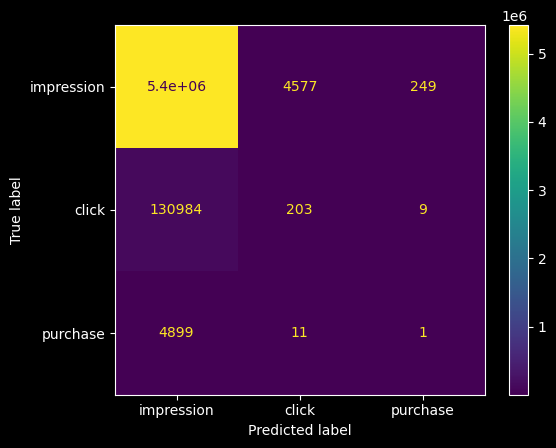

In [13]:
evaluate_and_draw(clf, X_test, y_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

模型自带分数：0.975139680330315
auc：[0.5985640216298315, 0.5979616951057416, 0.5353684614822048]


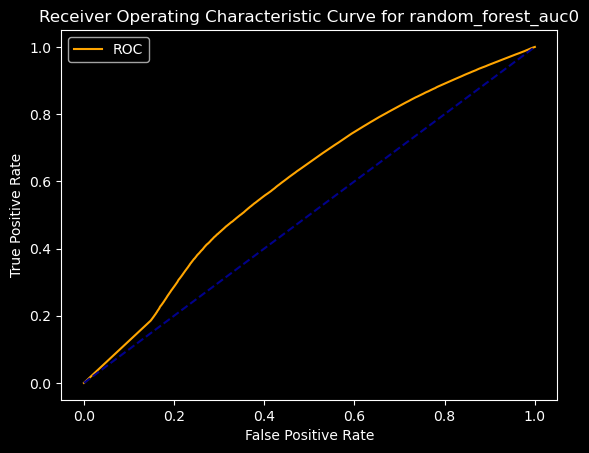

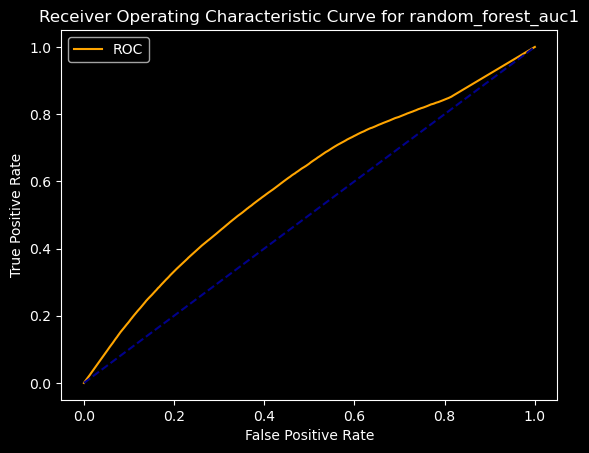

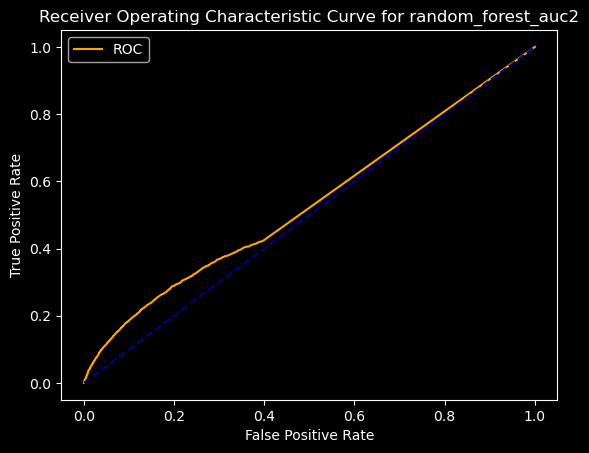

<Figure size 640x480 with 0 Axes>

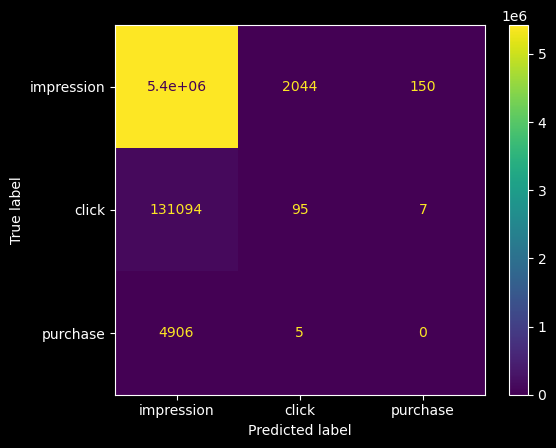

In [19]:
evaluate_and_draw(clf, X_test, y_test, 'random_forest')